# Test Project 4

For this project we will use the I-94 Interstate Highway Westbound Traffic Dataset to perform some exploration and analysis using the matplotlib.pyplot library.

We will analice this dataset in order to find indicators of heavy traffic in the I-94 Interstate Highway for vehicles going from Saint Paul to Minneapolis (east to west) in United States. The goal is to know what events cause the greater ammount of traffic.

In [1]:
import pandas as pd
traffic = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")

print(traffic.head())
print(traffic.tail())
print(traffic.info())

  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918  
      holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
48199    None  283.45      0.0      0.0          75        Clouds   
48200    None  282.76      0.0      0.0          90        Clouds   
48201    None  282.73      0.0      0.0   

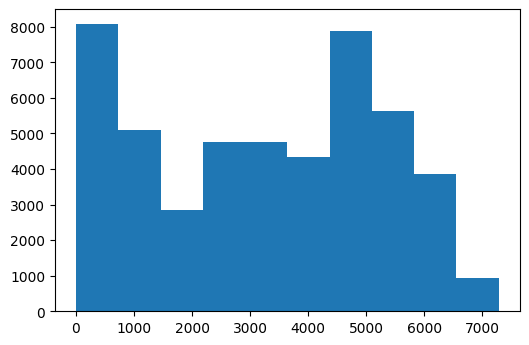

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(traffic["traffic_volume"])
plt.show()

print(traffic["traffic_volume"].describe())

There seems to be sometimes were the volume is 0, and most of the values are a bit higher than the mean.
The highest ammount of traffic volume seems to happen between 0 and 500 more or less, and between 4500 and 5000 more or less.
Lets try to compare data from daytime and nighttime.

In [3]:
traffic["date_time"] = pd.to_datetime(traffic["date_time"]) 

daytime = []
nighttime = []

hour = traffic["date_time"].dt.hour

daytime = traffic.copy()[(hour >= 7) & (hour <= 19)]
nighttime = traffic.copy()[((hour >= 0) & (hour < 7)) | ((hour > 19) & (hour <= 24))]

print("DAYTIME: \n", daytime.head())
print("NIGHTTIME: \n", nighttime.head())

DAYTIME: 
   holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   

  weather_description           date_time  traffic_volume  
0    scattered clouds 2012-10-02 09:00:00            5545  
1       broken clouds 2012-10-02 10:00:00            4516  
2     overcast clouds 2012-10-02 11:00:00            4767  
3     overcast clouds 2012-10-02 12:00:00            5026  
4       broken clouds 2012-10-02 13:00:00            4918  
NIGHTTIME: 
    holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
11    None  289.38      0.0      0.0           1        Clear   
12    None  288.61      0.0      0.0           1        Clear   
13    None  287.16      0.0      0.0

Daytime: 
 count    25838.000000
mean      4649.292360
std       1202.321987
min          0.000000
25%       4021.000000
50%       4736.000000
75%       5458.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Nighttime: 
 count    22366.000000
mean      1654.648484
std       1425.175292
min          0.000000
25%        486.000000
50%       1056.500000
75%       2630.750000
max       6386.000000
Name: traffic_volume, dtype: float64


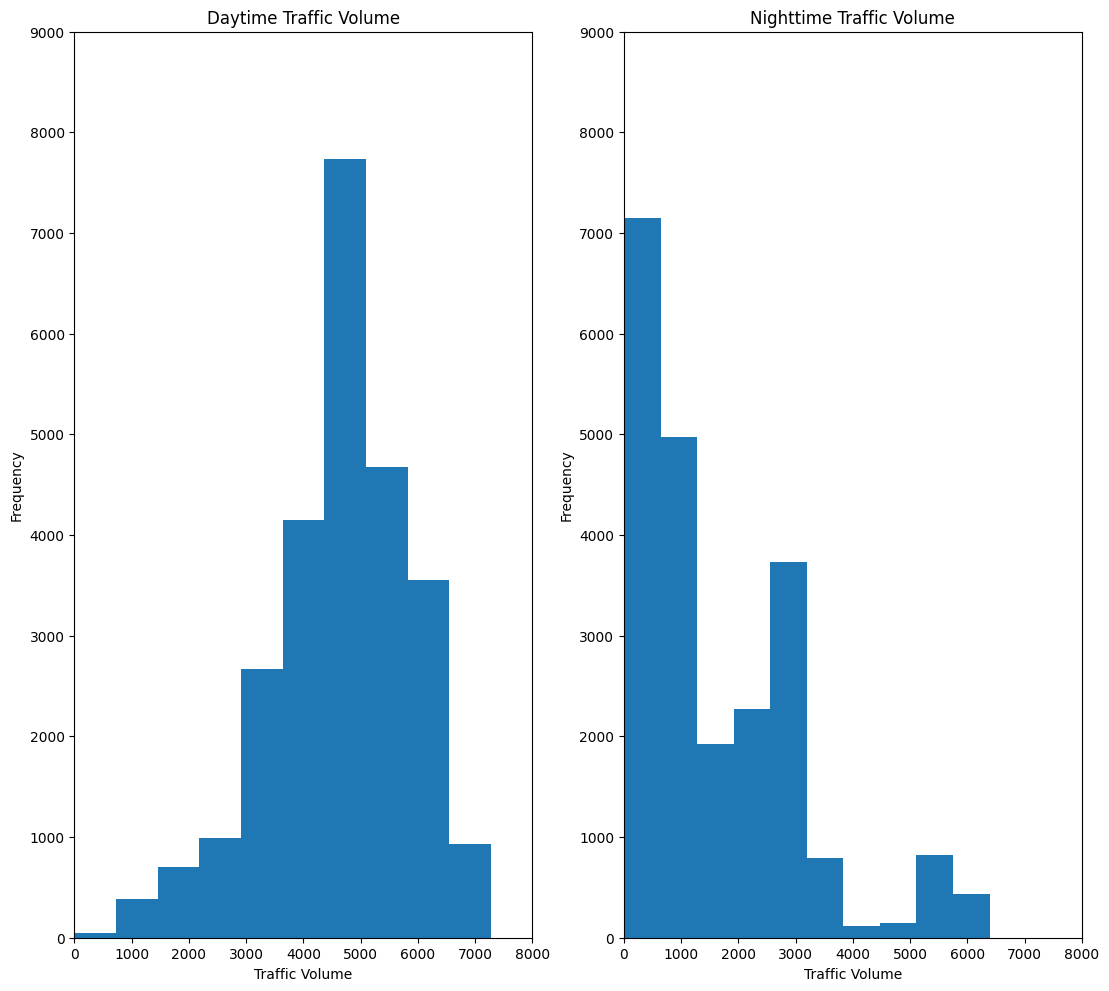

In [4]:
plt.figure(figsize = (13, 12))
plt.subplot(1, 2, 1)
plt.hist(daytime["traffic_volume"])
plt.xlabel("Traffic Volume")
plt.ylabel("Frequency")
plt.title("Daytime Traffic Volume")
plt.ylim([0, 9000])
plt.xlim([0, 8000])
plt.subplot(1, 2, 2)
plt.hist(nighttime["traffic_volume"])
plt.xlabel("Traffic Volume")
plt.ylabel("Frequency")
plt.title("Nighttime Traffic Volume")
plt.ylim([0, 9000])
plt.xlim([0, 8000])

print("Daytime: \n", daytime["traffic_volume"].describe())
print("\nNighttime: \n", nighttime["traffic_volume"].describe())

Lets remember that these graphics shows the FREQUENCY for the traffic volume for both daytime and nighttime, so even if we see that the graphic for nighttime shows higher bars, it is important to notice that the bars tend to be higher the fewer the traffic volume, in other words, the nighttime graphic shows bigger bars just because at that time is more frequent to find fewer traffic volume.
The hitogram for Daytime show an aproximately symmetrical distribution, while the Nighttime histogram shows and aproximately right skewed distribution. 

In [5]:
daytime["month"] = daytime["date_time"].dt.month
by_month = daytime.groupby("month").mean()
by_month["traffic_volume"]

month
1     4385.217310
2     4593.187798
3     4761.529676
4     4771.232816
5     4788.966639
6     4791.087488
7     4502.628360
8     4818.434690
9     4755.709916
10    4809.481678
11    4588.910486
12    4276.567081
Name: traffic_volume, dtype: float64

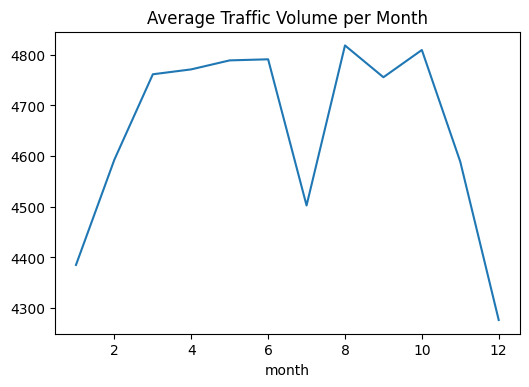

In [6]:
by_month["traffic_volume"].plot.line()
plt.title("Average Traffic Volume per Month")
plt.show()

We can she in the line chart that the traffic volume starts low starting the year, then grow and by the month of July, it decrease and rise again, decreasing once again in December.

dayofweek
0    4746.208029
1    5036.062431
2    5141.231163
3    5163.688063
4    5161.533588
5    3884.065668
6    3410.368091
Name: traffic_volume, dtype: float64


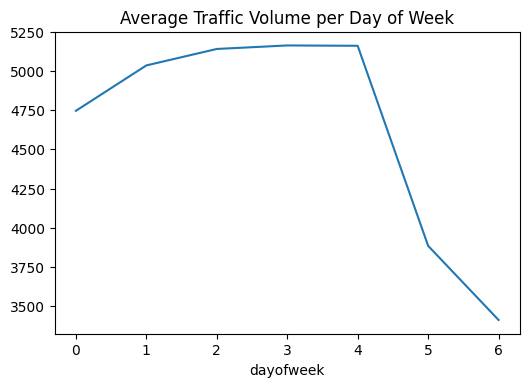

In [7]:
daytime["dayofweek"] = daytime["date_time"].dt.dayofweek
by_dayofweek = daytime.groupby("dayofweek").mean()
print(by_dayofweek["traffic_volume"])

by_dayofweek["traffic_volume"].plot.line()
plt.title("Average Traffic Volume per Day of Week")
plt.show()

In this chart we can see that the volume start to increase on Monday and starts to decrease during Friday.

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
19    3298.340426
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
19    3220.234120
Name: traffic_volume, dtype: float64


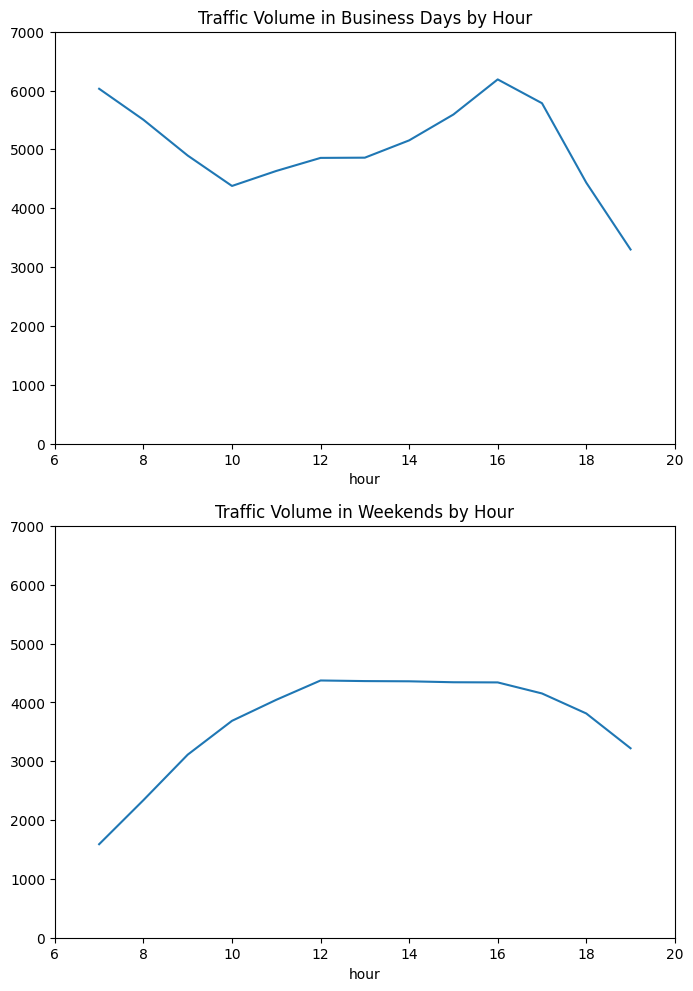

In [8]:
daytime["hour"] = daytime["date_time"].dt.hour
business_day = daytime.copy()[daytime["dayofweek"] <= 4]
weekend_day = daytime.copy()[daytime["dayofweek"] >= 5]
by_business_hour = business_day.groupby("hour").mean()
by_weekend_hour = weekend_day.groupby("hour").mean()

print(by_business_hour["traffic_volume"])
print(by_weekend_hour["traffic_volume"])

plt.figure(figsize = (8, 12))
plt.subplot(2, 1, 1)
by_business_hour["traffic_volume"].plot.line()
plt.xlim([6, 20])
plt.ylim([0, 7000])
plt.title("Traffic Volume in Business Days by Hour")
plt.subplot(2, 1, 2)
by_weekend_hour["traffic_volume"].plot.line()
plt.xlim([6, 20])
plt.ylim([0, 7000])
plt.title("Traffic Volume in Weekends by Hour")
plt.show()

As we can see in the charts, during business days the traffic volume increase during the start of the morning and ending of the afternoon, what could be tied to the hours of business start and ending.
And during weekend the traffic volume start to slowly increase during the morning and then normalize during the day.

In [9]:
daytime.corr()["traffic_volume"][["temp", "rain_1h", "snow_1h", "clouds_all"]]

temp          0.118084
rain_1h       0.004020
snow_1h       0.003768
clouds_all   -0.033410
Name: traffic_volume, dtype: float64

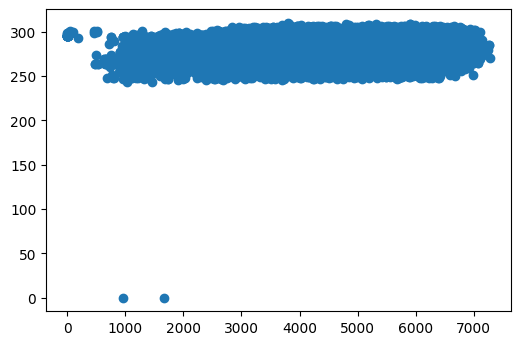

In [10]:
plt.scatter(daytime["traffic_volume"], daytime["temp"])
plt.show()

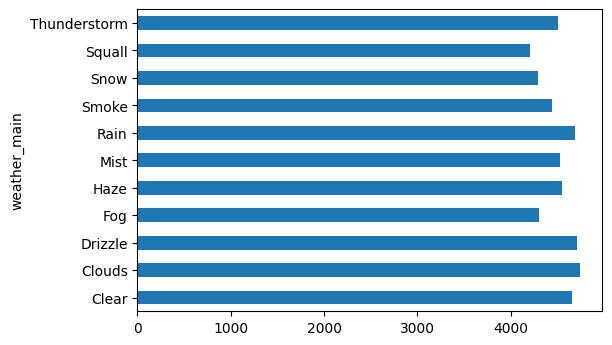

weather_main
Clear           4661.666879
Clouds          4746.375927
Drizzle         4712.699060
Fog             4298.933511
Haze            4545.434932
Mist            4530.901782
Rain            4686.953503
Smoke           4447.307692
Snow            4295.594612
Squall          4211.000000
Thunderstorm    4512.479042
Name: traffic_volume, dtype: float64


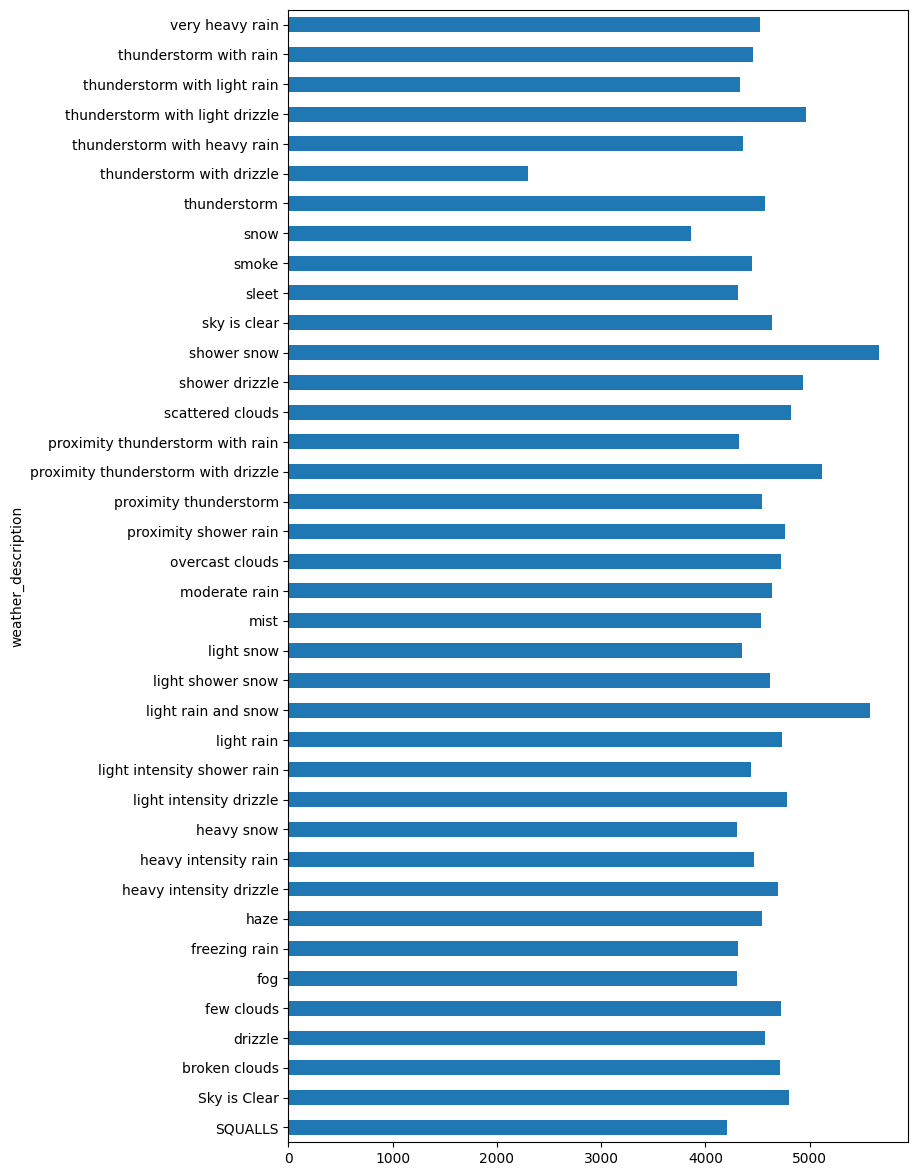

weather_description
SQUALLS                                4211.000000
Sky is Clear                           4802.848812
broken clouds                          4715.715045
drizzle                                4572.176849
few clouds                             4720.890763
fog                                    4298.933511
freezing rain                          4314.000000
haze                                   4545.434932
heavy intensity drizzle                4696.533333
heavy intensity rain                   4465.771429
heavy snow                             4300.826087
light intensity drizzle                4783.706362
light intensity shower rain            4437.454545
light rain                             4735.882162
light rain and snow                    5579.750000
light shower snow                      4618.636364
light snow                             4347.850144
mist                                   4530.901782
moderate rain                          4639.564103
overcast cl

In [11]:
by_weather_main = daytime.groupby("weather_main").mean()
by_weather_description = daytime.groupby("weather_description").mean()

by_weather_main["traffic_volume"].plot.barh()
plt.show()

print(by_weather_main["traffic_volume"])

by_weather_description["traffic_volume"].plot.barh(figsize = (8, 15))
plt.show()

print(by_weather_description["traffic_volume"])
print("\n\nWeather with Traffic Volume Mean over 5000:\n", by_weather_description.loc[by_weather_description["traffic_volume"] >= 5000, ["traffic_volume"]])

During our search for heavy traffic indicator, we decided to use the data for daytime since the traffic volume during nighttime decrease significantly, and we were able to see how the traffic volume increase starting at 7 morning, decrease a bit during the day, and increase once again at evening, showing that it could be related to the working hours in business day.  During weekends the increase in traffic volume showed a more logaritmic increment at the start of the day and decrement during the end of it. 

Then we checked the correlation between the different numerical values indicating the temperature and the ammount of time during certain time of climate, but unfortunatelly it did not show any type of obvious indicator for heavy traffic since all the results showed a pretty uniform distribution.
Last, we tried to show the realation with the taffic volume and each type of weather description, so this time the results should be more specific.
The chart show us how during the weathers described as "Light rain and snow", "proximity thunderstorm with drizzle", and "shower snow", the traffic volume increased more than with the rest of the weather descritions.

In conclusion, even when almost all the types of weather conditions showed an increase in the traffic volume, the weather contidions that seems to have a greather impact in this increment are "Light rain and snow", "proximity thunderstorm with drizzle", and "shower snow".